## Before We Begin

-   Special thanks to Oscar Barriga Cabanillas for helping out today
-   Thank you for BITSS for organizing
-   How has it been so far?
-   A Question:
    -   How familiar are you with python? Jupyter?
    -   What are you thinking of getting out of this talk?

## How to watch this presentation:

-   Either:
    -   `git clone` the repository
    -   Start up jupyter lab
    -   open `presentation.ipynb`
    -   follow along
-   Or:
    -   Go to the repository and press the `Launch Binder` Button
    -   To be explained later.

## Why Dynamic Documents?

Dynamic Documents are a part of the bigger picture of Reproducible Science. Sure, there is a fixed cost; **BUT**, they make my life easier in these ways:

-   Short term: Easier to document fresh out of the oven results
-   Medium term: Fast, reliable and tractable new results
-   Long term: You can see how everything was created

## What are Dynamic Documents?

Based on principles of literate programming, we aim at combining code and paper in one single document

-   Best framework to achieve the holy grail of one-click reproducible workflow
-   Best two current implementations: RMarkdown (R) & Jupyter (Python).
-   Stata is catching up: We will come back to this in a second

## The State of Things Now

Currently, the code and the narrative components live in separate universes

<img src="figures/flow_3.png" width="1000"/>

## Part of Larger Workflow

-   Dynamic documents are best used as part of a larger organized workflow
    -   Structuring folders: Data, analysis, output
    -   Documenting code
    -   Combining both into a final document: Pre analysis or final paper

## Markdown's Entrance

-   In terms of writing the "paper"/documentation part of dynamic documents, there are many solutions
    -   Latex, HTML, RST (ReStructured Text)
-   But most have honed in on using Markdown
    -   Markdown is an easy way to write formatted text in a plain text format
    -   But without as verbose and difficult of a syntax like latex/HTML
-   Although basic markdown has the basics for formatting, creating tables, adding figures
-   We will use Pandoc, which is used in both the Stata and R sessions

## Markdown Cheatsheet

There are loads of markdown cheatsheats on the web. One can be found [here](https://www.markdownguide.org/cheat-sheet/)

## Headings

    Title -> # Title
    Section -> ## Section
    Subsection -> ### Subsection
    Subsubsubsection ->  #### Subsubsubsection

## Lists

-   My list
    -   an *italic* and **bold** nested list

<!-- -->

    - My List
        - an *italic* and **bold** nested list

## Math

We assume that comparative advantage is $\alpha$ and $\alpha = \beta + \gamma$

    We assume that comparative advantage is $\alpha$ and $\alpha = \beta + \gamma$

$$\begin{aligned}
y_{it} = X_{it}\beta + \varepsilon_{it} \\
X_{it}  = Z_{it}\gamma + \nu_{it}
\end{aligned}$$

    $$\begin{aligned}
    y_{it} = X_{it}\beta + \varepsilon_{it} \\
    X_{it}  = Z_{it}\gamma + \nu_{it}
    \end{aligned}$$

## What is Pandoc?

-   Pandoc is sort of what it says: pan (all), doc (document)
-   It's a way to convert between and across different file formats
    -   Word -\> HTML
    -   Latex -\> Markdown
    -   HTML -\> XML
    -   Anything to anything
-   See Pandoc's [website](https://pandoc.org/MANUAL.html#options) for all input and output filetypes

## The Magic of Pandoc

-   Pandoc and Markdown allows you to create one file that can then be used in many different places
-   Example:
    -   You're writing your CV and want to put it up in various places.
    -   Your website needs HTML
    -   One job posting allows PDF
    -   One job posting only allows Word
-   Ordinarily, you would need to have three versions, Word, HTML, PDF
    -   This might get unruly as you change one but forget to change the other
    -   What if there's another file format you might need?
-   With Pandoc and markdown, you would:
    -   write your CV in markdown
    -   convert to PDF, Word and PDF with pandoc

## What are Jupyter Notebooks?

-   A way to do literate programming and dynamic documents
-   Provide code and writing/analysis, on a language agnostic platform
    -   Meaning that it is not restricted to just one language
    -   Currently there are so-called kernels for many languages
    -   Including Stata, Python, R, C, Golang, C++, Fortran and more coming!
-   Uses the power of Markdown/Latex Math and Code to tell a story and provide an efficient workflow
-   Convert into several different formats including Latex, HTML, Presentations etc...
-   The Jupyter server is also available in other text editors such as Atom and VS Code.
-   And now available in STATA!

## Under the Hood

-   You can think of Jupyter as broadly being made up of two parts:
    -   A JSON document that organizes text between markdown, code, figures, widgets, etc...
    -   A server that loads a "kernel" with a particular language and knows how to translate the markdown to formatted text and the code to execution
    -   A web interface (although not required)

<img src="figures/DeepinScreenshot_select-area_20190107171714.png" width="600"/>

## Why Jupyter Notebooks?

-   Jupyter is ubiquitous
-   Jupyter is used by basically all of the data science community
-   Jupyter is used by other software (VS Code, Atom/Hydrogen)
-   Since Jupyter is a JSON document and built using web tools, anything that uses webtools can use it
-   Science and publishing is changing (PDFs are becoming old, open access and web journals are becoming more popular)
    -   Present results in a dynamic way
    -   Interactive
    -   More efficient to show quick interactive widget to experiment with colleagues/advisors than 50 figures in a static PDF


## Running Code


In [1]:
#| echo: false

import stata_setup

stata_setup.config('/Applications/Stata 17/', 'mp')

In [2]:
%%stata
clear all
set obs 10

gen x = runiform()
gen treat = x > .2
gen y = runiform()


. clear all

. set obs 10
Number of observations (_N) was 0, now 10.

. 
. gen x = runiform()

. gen treat = x > .2

. gen y = runiform()

. 


In [3]:
%%stata
list x y


     +---------------------+
     |        x          y |
     |---------------------|
  1. | .5662265   .5754215 |
  2. | .1778325   .3678161 |
  3. |  .113999   .3005246 |
  4. | .5955869    .007538 |
  5. | .6251604   .6701369 |
     |---------------------|
  6. |  .634899   .4241406 |
  7. | .9944572   .9537622 |
  8. | .7497677   .0867478 |
  9. | .1736788   .8949648 |
 10. | .6107705   .5890286 |
     +---------------------+


## Figures



. twoway scatter y x

. graph export "scatter.png", replace
file scatter.png written in PNG format

. 


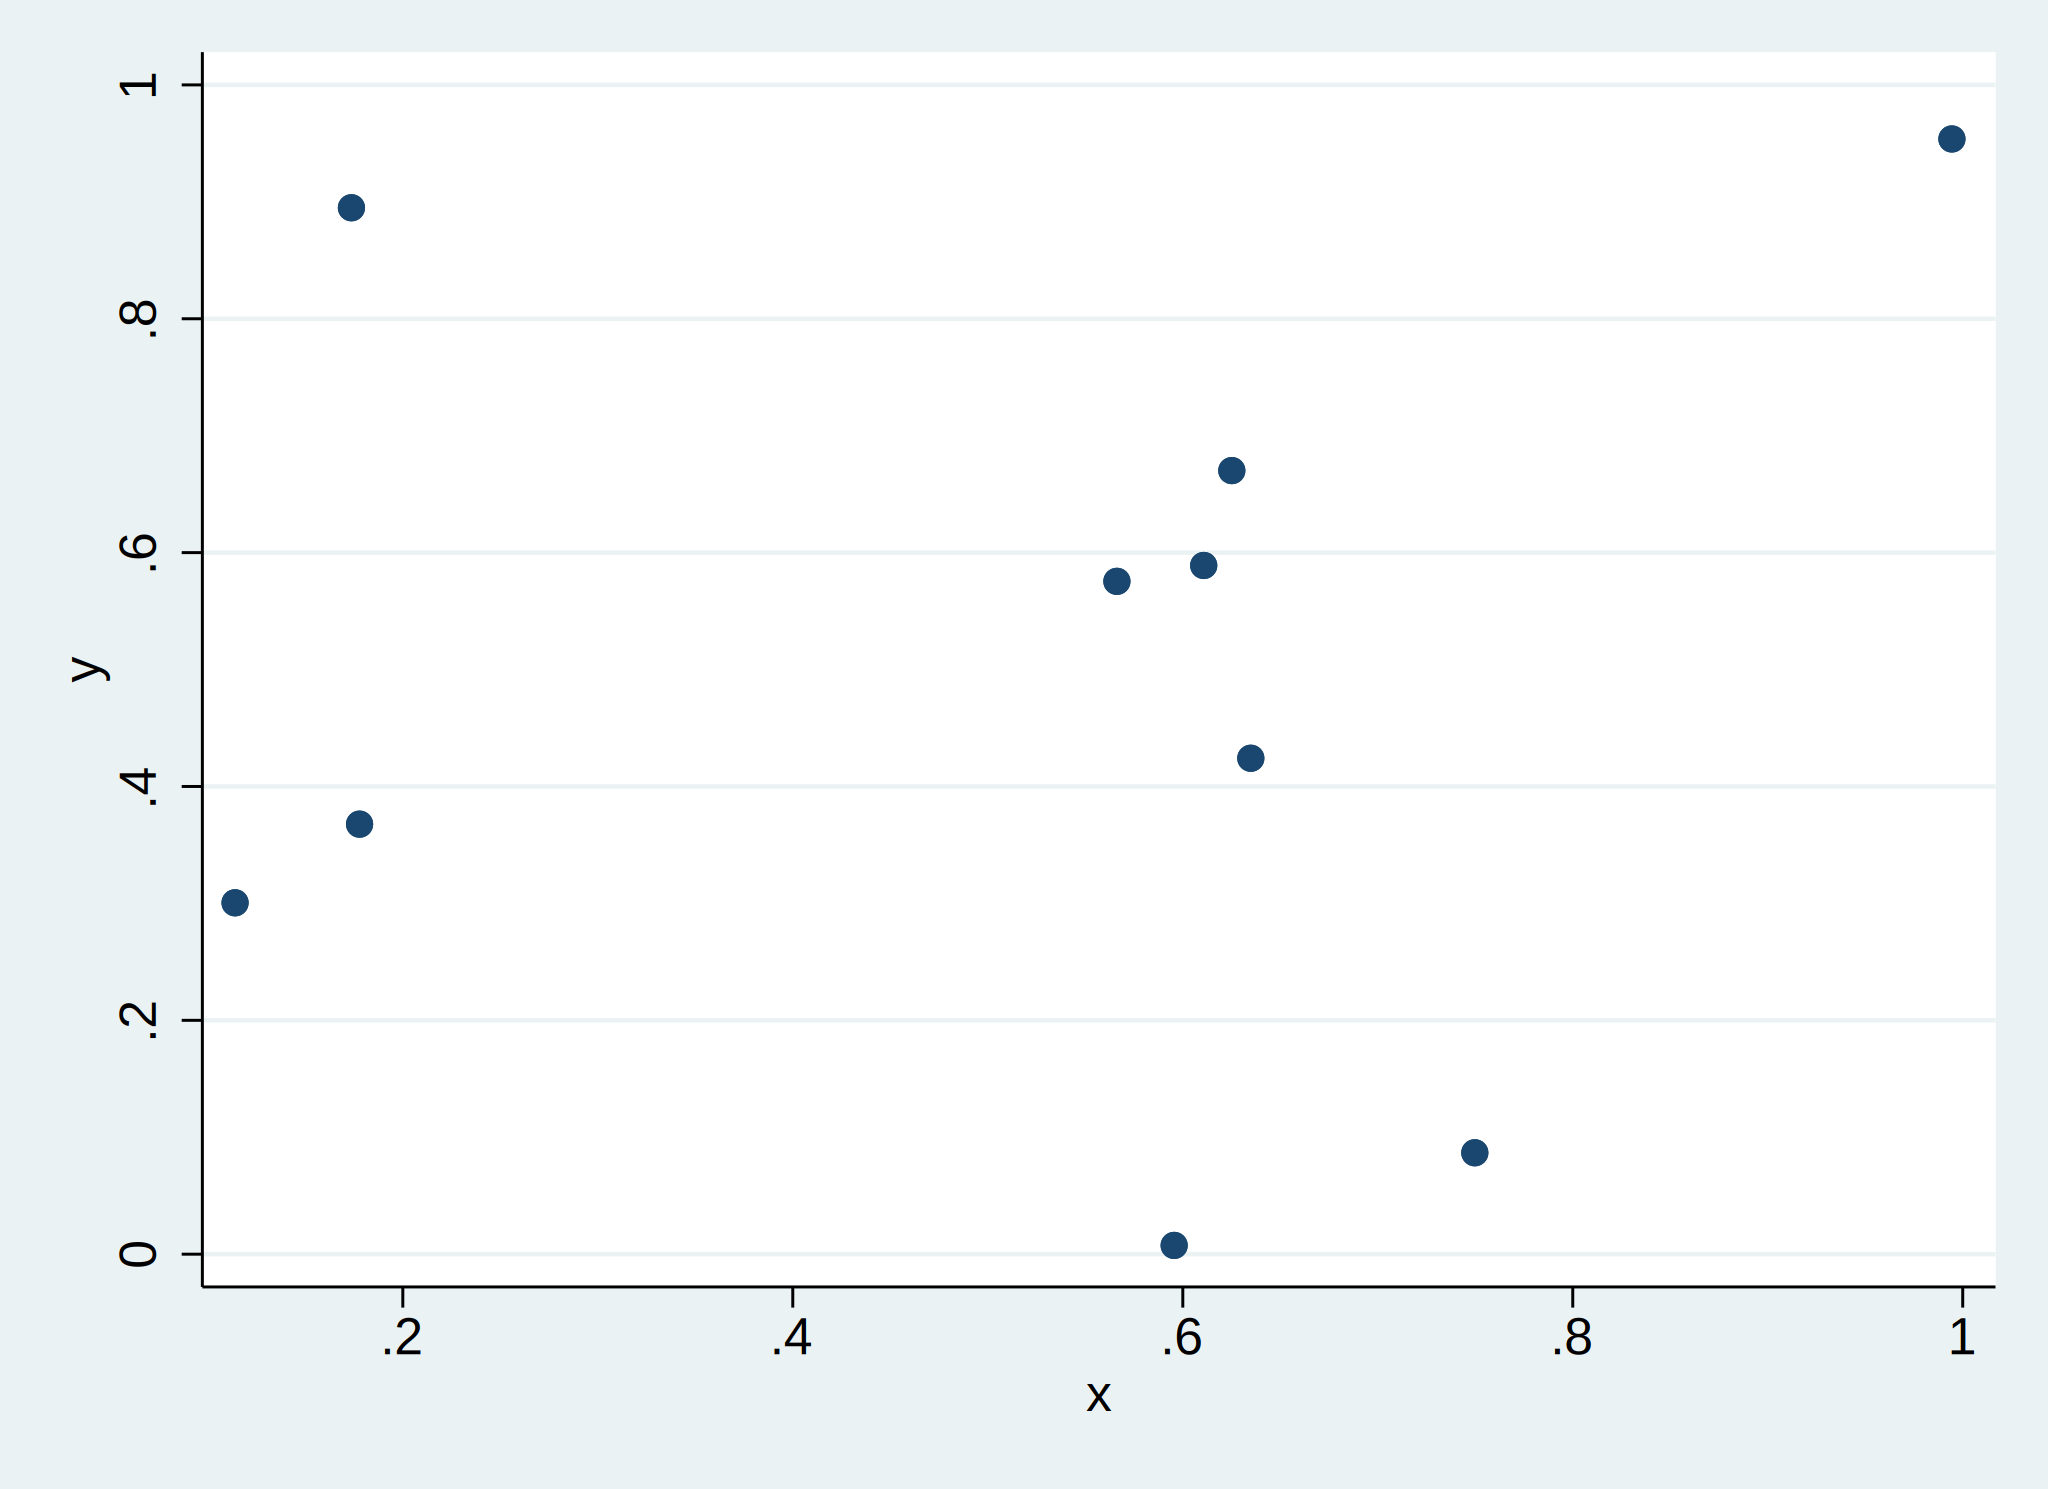

In [4]:
#| output: false
%%stata
twoway scatter y x
graph export "scatter.png", replace

![A graph with a caption](scatter.png)

## 


In [5]:
#| output: asis
%%stata

eststo model: qui reg y t x

esttab model, tex


. 
. eststo model: qui reg y t x

. 
. esttab model, tex

{
\def\sym#1{\ifmmode^{#1}\else\(^{#1}\)\fi}
\begin{tabular}{l*{1}{c}}
\hline\hline
            &\multicolumn{1}{c}{(1)}\\
            &\multicolumn{1}{c}{y}\\
\hline
treat       &      -0.621         \\
            &     (-1.23)         \\
[1em]
x           &       1.085         \\
            &      (1.25)         \\
[1em]
\_cons      &       0.353         \\
            &      (1.55)         \\
\hline
\(N\)       &          10         \\
\hline\hline
\multicolumn{2}{l}{\footnotesize \textit{t} statistics in parentheses}\\
\multicolumn{2}{l}{\footnotesize \sym{*} \(p<0.05\), \sym{**} \(p<0.01\), \sym{
> ***} \(p<0.001\)}\\
\end{tabular}
}

. 


## Exporting

-   Exporting to HTML, PDF and slides is possible through the menu: File -\> Export Notebook as -\> PDF

## Binder and Hosting Notebooks

-   Jupyter is great and all, but what if you advisor/boss doesn't have Jupyter installed?
-   What if they do, but they don't have all the dependencies needed for your cool dashboard?
-   That's where binder comes in
-   Binder uses `docker` to create a containerized version of your notebook with all dependencies installed and anyone can access it even if they don't have jupyter installed at all.
-   They just need a web browser
-   We've already seen how this works, either with the dashboard or with this very presentation!
-   All you need is a public github repository and notebook in that repository and that's it!
-   Waiting time for spinning up the notebook will vary
-   While it's spinning it up, any questions so far?

## Port-forwarding and setting up Jupyter to work on a server

-   Many people might have servers in their universities/organizations that are more powerful than a laptop.
-   Jupyter allows the ability to run a notebook locally (on your laptop screen), but using the power of the server.
    -   This requires jupyter being installed on the server
    -   This isn't a difficult thing to do for a sysadmin, so it's worth finding out whether that's possible

### Setting up jupyter on a server

-   The first thing you need to do is log on to the server and start a jupyter instance:

`jupyter notebook --no-browser --port=8888`

-   This tells the server to start an instance of jupyter, without a browser (we won't need it, nor can a server open up a browser window), in port 8888 (this will be important later)

-   For Mac users, you can use `ssh` to finish the process. Just type: `ssh username@host -L 8888:localhost:8888`

-   Which will forward your computer 8888 port, to the server's 8888 port.

-   For Windows, ssh also exists, but you will need to enable it.

    -   head to Settings \> Apps and click "Manage optional features" under Apps & features.
    -   Click Add a Feature, and find OpenSSH

-   Then use the same command as for Macs: `ssh username@host -L 8888:localhost:8888`

-   Then go to your browser:

    -   `localhost:8888` and you should be taken to a Jupyter page and prompted for a token.
    -   You can find this token in the window where you started Jupyter on the server
        -   Copy and paste this token into the prompt, and VOILA!

-   Now you have Jupyter running on your computer's browser window, but with the power of the server!


## Shameless self-promotion

-   Export notebook to a do-file!

<https://github.com/amichuda/jupyter-doexport>

## Taking all this to Pure Text

-   One drawback of jupyter (besides dependencies) is the fact that you need to install all of this and use a browser
-   Not very good for version control
- Meet `quarto`
- Lots of features
- Uses jupyter underneath for code execution
-  write just markdown
- Extensions, including templates for popular journals (elsevier...)
 
## Requires one more thing: YAML





```{yaml}
---
title: My Title
author: Me
format:
    pdf:
        - key 1
        - key 2
        - key 3
---

```





## A Stata Equivalent?

-   `stata-markdown`
-   `dyndoc`
-   `putdocx`
-   `putpdf`

## Other Extras not Covered

-   `jupyter-cache`
-   `codebraid`
-   `binder` and `docker`